<a href="https://colab.research.google.com/github/alirezakavianifar/gitTutorial/blob/developer/ExplorationAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representation of Adaptation Options in Software Systems with Large Adaptation Spaces

Let $\mathbf{A}$ represent the set of adaptation options in a software system with a large adaptation space. Each adaptation option $\mathbf{a}$ in $\mathbf{A}$ is represented as a vector:

$$
\mathbf{A} = \{ \mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n \}
$$

Where $\mathbf{a}_i$ is an adaptation option vector defined as:

$$
\mathbf{a}_i = [a_{i1}, a_{i2}, a_{i3}, \ldots, a_{im}]
$$

Here:
- $m$ is the number of decision variables or parameters that can be changed in the software system.
- $a_{ij}$ represents the change in the $j$-th decision variable for the $i$-th adaptation option. This change could be an increase, decrease, or any modification to the corresponding variable.
- Each $a_{ij}$ is subject to constraints and ranges depending on the nature of the decision variable and the requirements of the system.

For example, in a system where decision variables could include parameters like energy consumption, packet distribution, processing speed, etc., each adaptation option vector $\mathbf{a}_i$ would specify how these variables are adjusted to adapt the system to different conditions or requirements.


## Challenges:

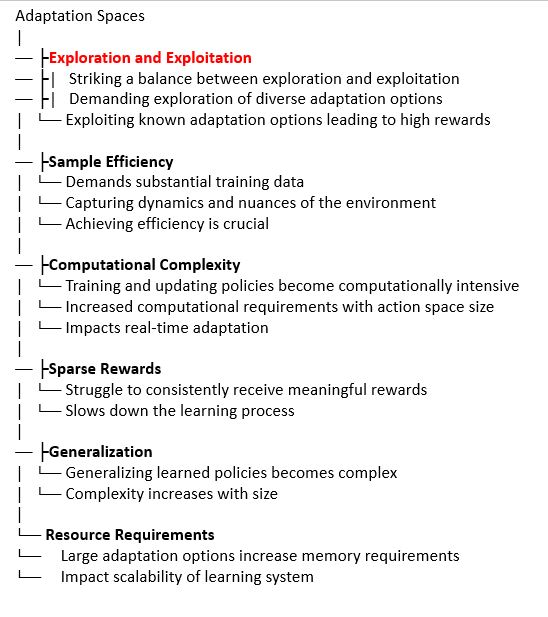

In [2]:
from IPython.display import Image

# Replace 'image.jpg' with the path to your image file
Image('image.JPG')

##Problem Formulation in terms of RL

###Type 1:
 States
- **Definition**: A state represents a specific configuration of the software system.
- **State Space**: The set of all possible configurations of the system.
- **State Representation**: Each state can be represented as a vector where each element corresponds to a decision variable of the system.
  - For example, if your system has decision variables such as cache size, thread count, and logging level, a state might look like \$( s = [\text{cache size}, \text{thread count}, \text{logging level}] \$).

### Actions
- **Definition**: An action represents a change in one or more decision variables of the system, leading to a new configuration.
- **Action Space**: The set of all possible changes that can be made to the system's configuration.
- **Action Representation**: Actions can be discrete and defined as modifications to specific elements of the state vector.
  - For example, actions might be \( $a_1 = \text{increase cache size} $\), \( $a_2 = \text{decrease thread count} $\), etc.

### Rewards
- **Definition**: A reward quantifies the quality properties of the system after applying an action and transitioning to a new state.
- **Reward Function**: The function that maps state-action pairs to a numerical value reflecting the system’s performance or quality properties.
- **Reward Representation**: The reward could be a scalar value derived from various quality properties, such as performance metrics, resource utilization, or user satisfaction.
  - For example, the reward could be \$( r = \text{performance metric} - \text{resource usage penalty} $\).

### Example Scenario
Suppose your software system's configuration impacts its performance and resource utilization. Here’s how you might define the states, actions, and rewards:

1. **States**:
   - **State Vector**: \( $s = [\text{cache size}, \text{thread count}, \text{logging level}] $\)
   - **Example State**: \( $s = [512 \text{MB}, 8 \text{threads}, \text{INFO}] $\)

2. **Actions**:
   - **Action Set**: \($ a_1 = \text{increase cache size by 128 MB}, a_2 = \text{decrease thread count by 1}, a_3 = \text{set logging level to DEBUG} $\)
   - **Example Action**: \( $a = \text{increase cache size by 128 MB} $\)

3. **Rewards**:
   - **Reward Function**: \( $$r(s, a, s') = \text{performance}(s') - \alpha \cdot \text{resource usage}(s') $$\)
   - **Example Reward**: If increasing cache size improves performance by 10 units but increases resource usage cost by 2 units, the reward could be \($$ r = 10 - 2\alpha $$\)

### Steps to Model the System in RL:

1. **Define the State Space**:
   - Identify all decision variables and possible values they can take.
   - Represent each configuration as a vector.

2. **Define the Action Space**:
   - List all possible changes to the decision variables.
   - Ensure actions lead to valid configurations.

3. **Define the Reward Function**:
   - Determine the quality properties impacted by configurations.
   - Formulate a reward function that balances performance, resource usage, and other relevant metrics.

4. **Set Up the RL Environment**:
   - Implement a simulation or environment that can transition between states based on actions and compute rewards.





### Example Software System
Suppose your software system has the following three decision variables:
1. **Cache Size**: Can be 128 MB, 256 MB, 512 MB, or 1024 MB.
2. **Thread Count**: Can be 2, 4, 8, or 16.
3. **Logging Level**: Can be OFF, ERROR, WARN, INFO, or DEBUG.

### State Space
The state space is the set of all possible configurations of the system. Each configuration is represented as a vector of decision variables.

#### State Representation:
- **Cache Size (CS)**: {128 MB, 256 MB, 512 MB, 1024 MB}
- **Thread Count (TC)**: {2, 4, 8, 16}
- **Logging Level (LL)**: {OFF, ERROR, WARN, INFO, DEBUG}

#### Number of Possible States:
To find the total number of states, we multiply the number of possible values for each decision variable:
\[ $$\text{Total States} = |\text{CS}| \times |\text{TC}| \times |\text{LL}| \]
\[ \text{Total States} = 4 \times 4 \times 5 = 80 \$$]

### Action Space
The action space is the set of all possible actions that can change the configuration of the system. Each action represents a change in one of the decision variables.

#### Action Representation:
- Actions can be defined as changes to each decision variable. For simplicity, we assume that an action can either increase or decrease a decision variable's value, or change it to a specific value.

Let's enumerate the actions for each decision variable:

1. **Cache Size**:
   - Increase Cache Size (if not at maximum): {128 -> 256, 256 -> 512, 512 -> 1024}
   - Decrease Cache Size (if not at minimum): {1024 -> 512, 512 -> 256, 256 -> 128}

2. **Thread Count**:
   - Increase Thread Count (if not at maximum): {2 -> 4, 4 -> 8, 8 -> 16}
   - Decrease Thread Count (if not at minimum): {16 -> 8, 8 -> 4, 4 -> 2}

3. **Logging Level**:
   - Change Logging Level to a different value: {OFF, ERROR, WARN, INFO, DEBUG}

#### Number of Possible Actions:
- For Cache Size, there are 3 possible increases and 3 possible decreases (total 6 actions).
- For Thread Count, there are 3 possible increases and 3 possible decreases (total 6 actions).
- For Logging Level, each level can change to 4 other levels, so there are \$(5 \times 4 = 20\$) actions.

Thus, the total number of actions is:
\$[\text{Total Actions} = 6 (\text{Cache Size}) + 6 (\text{Thread Count}) + 20 (\text{Logging Level}) = 32 \$]

### Summary
- **State Space**: 80 possible states.
- **Action Space**: 32 possible actions.

### Example Calculation for Specific States and Actions
#### State Example:
- State Vector: \$( s = [256 \text{ MB}, 4 \text{ threads}, \text{INFO}] \)$

#### Action Example:
- Action: Increase Cache Size from 256 MB to 512 MB.

#### Transition:

- Current State: \($s = [256 \text{ MB}, 4 \text{ threads}, \text{INFO}] $\)
- Action Applied: Increase Cache Size
- New State: \($ s' = [512 \text{ MB}, 4 \text{ threads}, \text{INFO}] $\)


###References
####Samin, H., Bencomo, N. and Sawyer, P., 2022. Decision-making under uncertainty: be aware of your priorities. Software and Systems Modeling, 21(6), pp.2213-2242.

### Type 2:

We can consider each vector configuration as an action in your reinforcement learning setup. This approach treats the selection of a specific configuration as an atomic action, rather than defining actions as changes to individual decision variables. This method can simplify the action space and is particularly useful if transitioning between configurations is straightforward and does not require incremental changes.

### States, Actions, and Rewards in This Context

#### States:
- **Definition**: States represent the current performance and quality metrics of the system based on its configuration.
- **State Representation**: You can represent the state as a vector of performance metrics, resource usage, and other relevant system characteristics.
  - Example: \( $$s = [\text{CPU usage}, \text{Memory usage}, \text{Response time}, \text{Error rate}] $$\)

#### Actions:
- **Definition**: Actions correspond to selecting a specific configuration of the system.
- **Action Representation**: Each action is a unique vector representing a possible configuration.
  - Example: \( $$a = [\text{cache size}, \text{thread count}, \text{logging level}] $$\)
- **Action Space**: The set of all possible configurations.
  - For the given example, with 4 cache sizes, 4 thread counts, and 5 logging levels, the total number of actions is:
    $$\[
    \text{Total Actions} = 4 \times 4 \times 5 = 80
    \]$$

#### Rewards:
- **Definition**: Rewards quantify the quality of the system performance under a particular configuration.
- **Reward Function**: The function that maps state-action pairs to a numerical value reflecting the system’s performance or quality properties.
  - Example: \($$ r = \text{performance metric} - \text{resource usage penalty} $$\)

### Example Framework with Configuration as Actions

1. **State Space**:
   - Representing the system’s operational metrics, such as CPU usage, memory usage, response time, and error rate.
   - Example state vector: \( $s = [30\%, 2048 \text{ MB}, 200 \text{ ms}, 0.01] $\)

2. **Action Space**:
   - Each action is a unique configuration.
   - Example action vectors:
     - \($ a_1 = [128 \text{ MB}, 2 \text{ threads}, \text{OFF}] $\)
     - \($ a_2 = [256 \text{ MB}, 4 \text{ threads}, \text{ERROR}] $\)
     - ...
     - \( $a_{80} = [1024 \text{ MB}, 16 \text{ threads}, \text{DEBUG}] $\)

3. **Rewards**:
   - A scalar value based on the system’s performance and resource usage under the chosen configuration.
   - Example reward function:
     - \( $r = \text{performance metric} - \alpha \times \text{resource usage} $\)


### Summary
- **State Space**: Represents system performance and quality metrics.
- **Action Space**: Consists of all possible configurations of the system.
- **Rewards**: Based on system performance and resource usage.

This approach can simplify the problem by treating each configuration as a distinct action, making it easier to optimize the system’s performance using reinforcement learning techniques.

###References:
####Metzger, A., Quinton, C., Mann, Z.Á., Baresi, L. and Pohl, K., 2024. Realizing self-adaptive systems via online reinforcement learning and feature-model-guided exploration. Computing, 106(4), pp.1251-1272.

The choice between treating configurations as individual actions versus defining actions as changes to decision variables depends on several factors related to your specific problem and goals. Here’s a breakdown to help you decide which approach might be more suitable for your scenario:

### Treating Each Configuration as an Action
#### Advantages:
1. **Simplicity**: Each action directly corresponds to a unique configuration, simplifying the action selection process.
2. **Comprehensive Exploration**: Ensures that the RL agent considers the entire configuration space without needing to worry about incremental changes.
3. **Ease of Implementation**: Straightforward to implement, as you don’t need to define how actions change individual variables.

#### Disadvantages:
1. **Large Action Space**: The action space can become very large if the number of possible configurations is high, potentially leading to slower learning.
2. **Scalability**: May not scale well if there are many decision variables with numerous possible values.

### Treating Actions as Changes to Decision Variables
#### Advantages:
1. **Smaller Action Space**: Reduces the number of actions by focusing on changes to individual variables, which can lead to faster learning.
2. **Fine-grained Control**: Allows for more granular exploration and exploitation by making incremental changes to the system’s configuration.
3. **Scalability**: More scalable for systems with many decision variables or large ranges for each variable.

#### Disadvantages:
1. **Complexity**: Requires more complex logic to handle the transitions between states, especially to ensure valid configurations.
2. **Exploration Issues**: May need additional mechanisms (e.g., exploration strategies) to ensure sufficient exploration of the configuration space.

### Which is Preferable?
The preferable approach depends on the specifics of your system:

- **Use Treating Each Configuration as an Action if**:
  - The total number of configurations is manageable (e.g., not in the millions).
  - You prefer simplicity and a direct mapping from actions to configurations.
  - You want to ensure the RL agent explores the entire configuration space comprehensively.

- **Use Treating Actions as Changes to Decision Variables if**:
  - The configuration space is very large, and an exhaustive approach would be infeasible.
  - You need finer control over how configurations are explored and exploited.
  - You are dealing with many decision variables, and scalability is a concern.

### Practical Considerations
- **Hybrid Approach**: In some cases, a hybrid approach might be beneficial, where major configurations are treated as actions, and within each major configuration, fine-tuning is done through changes to individual variables.
- **Domain Knowledge**: Leverage domain knowledge to reduce the action space by focusing on the most impactful configurations or changes.
- **Exploration Strategy**: Implement robust exploration strategies (e.g., epsilon-greedy, Upper Confidence Bound) to ensure the agent adequately explores the configuration space, especially if using the incremental change approach.

### Example Scenario
For a concrete example, let’s assume the following:
- **Total Configurations**: 100 (manageable size)
- **Decision Variables**: 3 (cache size, thread count, logging level)
- **Configuration Space**: Small enough to consider each configuration as an action.

In this case, treating each configuration as an action might be preferable due to simplicity and comprehensive exploration.

However, if the configuration space expands to thousands or more, with many possible values for each decision variable, treating actions as changes to decision variables would be more scalable and efficient.

### Conclusion
The decision ultimately hinges on the size and complexity of your configuration space and the specific requirements of your system. Evaluating these factors will guide you to the most appropriate approach for modeling your software system in terms of RL.

# choosing a deep reinforcement learning (DRL) algorithm for optimizing software systems with large discrete configuration spaces

When choosing a deep reinforcement learning (DRL) algorithm for optimizing software systems with large discrete configuration spaces, you should consider factors such as the nature of your action space, the need for scalability, and how well the algorithm can handle non-stationary reward distributions. Below are some of the most suitable DRL algorithms for such scenarios:

### 1. **Deep Q-Network (DQN) and Variants**
#### Why Suitable:
- **Discrete Action Space**: DQN is designed for discrete action spaces, making it a good fit for software configurations that can be represented as discrete choices.
- **Stability and Performance**: Variants like Double DQN and Dueling DQN improve stability and performance by addressing issues like overestimation bias.

#### Key Features:
- **Experience Replay**: Helps in stabilizing training by breaking the correlation between consecutive samples.
- **Target Network**: Improves stability by reducing the oscillations in Q-value updates.

### 2. **Policy Gradient Methods (e.g., REINFORCE)**
#### Why Suitable:
- **Direct Policy Optimization**: Can directly optimize policies, which may be beneficial if your configuration space can be parameterized.
- **Stochastic Policies**: Useful if there's inherent randomness or if you need to explore a wide range of configurations initially.

#### Key Features:
- **Policy Gradient**: Directly computes the gradient of the expected reward with respect to policy parameters, making it effective for high-dimensional action spaces.

### 3. **Actor-Critic Methods (e.g., A3C, A2C, PPO)**
#### Why Suitable:
- **Combining Value and Policy Methods**: Actor-Critic methods leverage both value functions (critic) and policy optimization (actor), which can lead to more efficient learning.
- **Adaptability**: Algorithms like Proximal Policy Optimization (PPO) provide a good balance between sample efficiency and ease of implementation.

#### Key Features:
- **Advantage Estimation**: Provides more stable updates by reducing variance in policy gradients.
- **Parallel Training**: Asynchronous methods like A3C can speed up training by using parallel environments.

### 4. **Soft Actor-Critic (SAC)**
#### Why Suitable:
- **Continuous Action Space Adaptation**: Though primarily designed for continuous actions, SAC can be adapted for discrete spaces and is particularly good for handling non-stationary environments.
- **Entropy Regularization**: Encourages exploration by adding an entropy term to the reward, which is useful in large configuration spaces.

#### Key Features:
- **Maximum Entropy Framework**: Ensures the policy explores more by encouraging higher entropy.
- **Stability**: Off-policy nature and clipped double Q-learning reduce training instability.

### Summary of Key Algorithms:
| Algorithm        | Action Space   | Key Features                                                   | Suitability for Software Systems                          |
|------------------|----------------|----------------------------------------------------------------|----------------------------------------------------------|
| DQN and Variants | Discrete       | Experience replay, target network, Double DQN, Dueling DQN     | Suitable for discrete configurations, stable performance |
| REINFORCE        | Discrete       | Stochastic policies, direct policy optimization                | Good for parameterized configurations                    |
| A3C/A2C          | Discrete       | Parallel training, advantage estimation                        | Efficient learning, adaptable                            |
| PPO              | Discrete       | Clipped objective, policy updates                              | Sample efficient, easy to implement                      |
| SAC              | Continuous/Discrete | Maximum entropy, entropy regularization                          | Good for non-stationary rewards, adaptable               |

### Example Use Case: Optimizing Software Configurations with PPO
#### Why PPO?
- **Stability and Efficiency**: PPO's clipped objective function ensures stable and efficient policy updates, making it suitable for scenarios where reward distributions change over time.
- **Adaptability**: PPO can handle large discrete action spaces effectively and adapt to changes in reward distribution.

#### Implementation Outline:
1. **State Representation**: Define the state as a vector of performance metrics.
2. **Action Space**: Each action corresponds to a unique software configuration.
3. **Reward Function**: Define a reward based on system performance, resource usage, and quality metrics.

### Conclusion
For optimizing software systems with large discrete configuration spaces and potentially non-stationary reward distributions, algorithms like **PPO**, **A3C/A2C**, **SAC (adapted for discrete actions)**, and **DQN and its variants** are suitable choices. Among these, **PPO** stands out due to its balance of stability, efficiency, and adaptability, making it a strong candidate for such applications.